# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import joblib


# Import Data

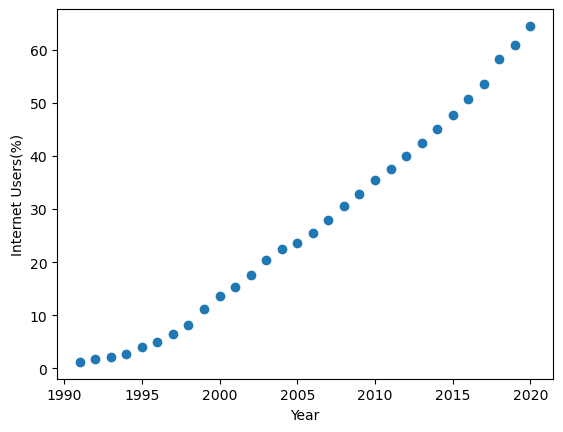

In [2]:
df = pd.read_csv('Cleaned_Internet_Users.csv')
df.head()
year = sorted(df['Year'].unique())
mean_internet_users_percentage = df.groupby(['Year'])['Internet Users(%)'].mean().tolist()
plt.xlabel("Year")
plt.ylabel("Internet Users(%)")
plt.scatter(year,mean_internet_users_percentage)

# Trainig Model

LinearRegression()

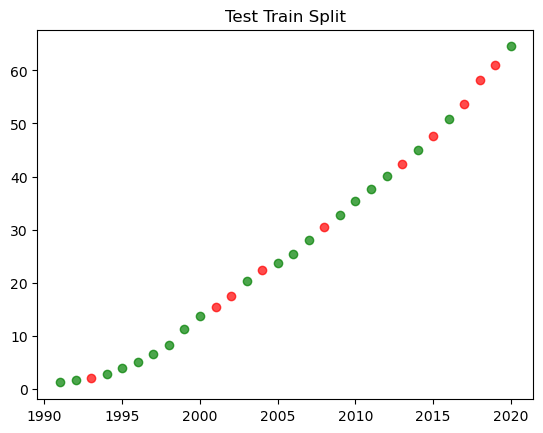

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(year, mean_internet_users_percentage, test_size = 1/3, random_state = 0 )
plt.scatter(X_train,Y_train, label='Training Data', color='g', alpha=.7)
plt.scatter(X_test,Y_test,  label='Test Data', color='r', alpha=.7)
plt.title("Test Train Split")

#print(X_train)
#print(Y_train)

X_train=np.array(X_train)


ml=LinearRegression()
ml.fit(X_train.reshape(-1, 1),Y_train)

# Test Model

In [4]:
c = ml.intercept_
m = ml.coef_
#print(m)
#print(c)

Y_pred = ml.predict(X_train.reshape(-1, 1))
#print(Y_pred)

# Model Evaluation

In [5]:
r2_score(Y_train,Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train,Y_pred))
r2 = r2_score(Y_train,Y_pred)
print(r2)
print(rmse)

0.9804358361258412
2.5233952151740873


# Plot Result

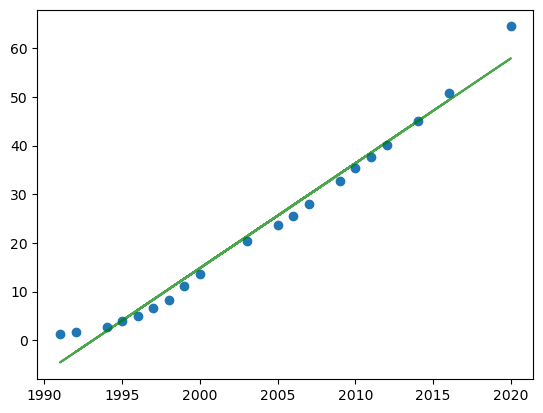

In [6]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred, label='Training Data', color='g', alpha=.7)

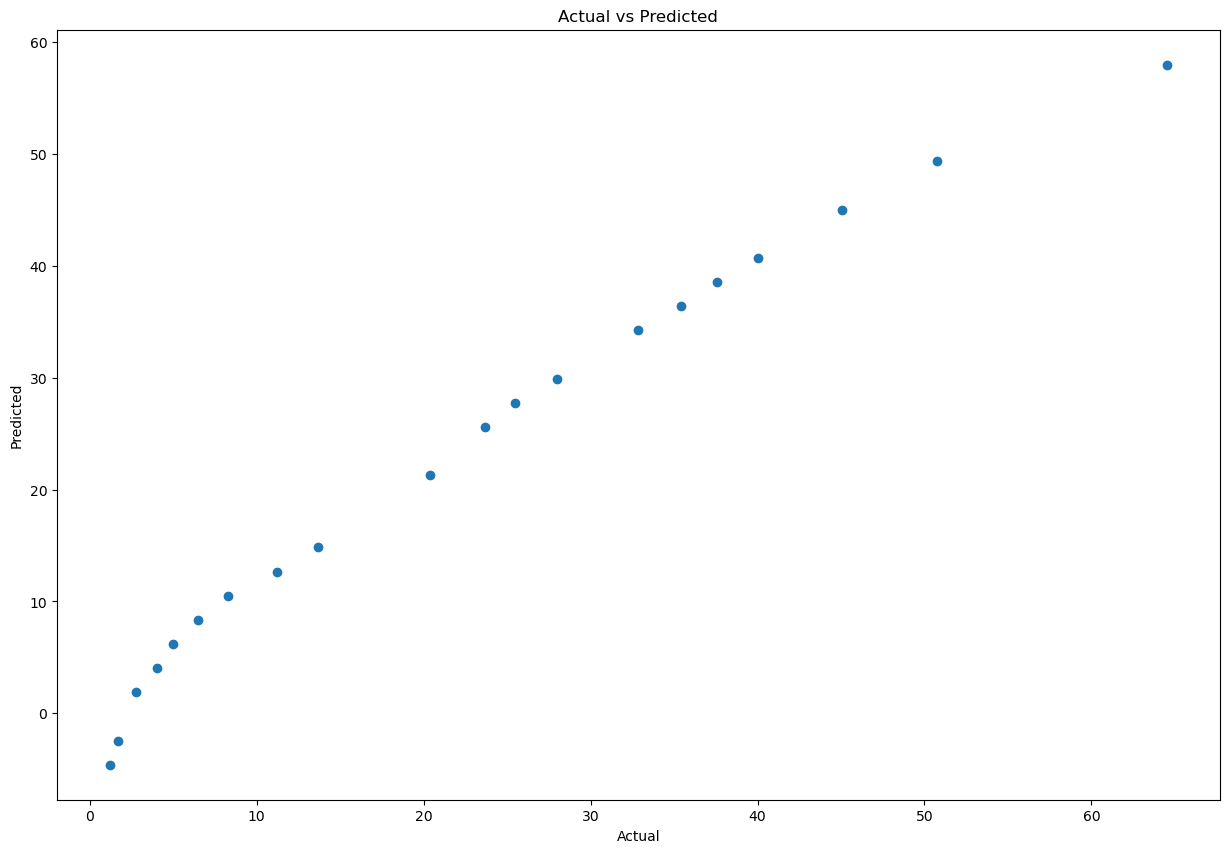

In [7]:
plt.figure(figsize=(15,10))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.scatter(Y_train,Y_pred)


In [8]:
pre_df = pd.DataFrame({'Actual Value':Y_train, 'Predicted Value':Y_pred, 'Difference':Y_train-Y_pred})
pre_df

,Actual Value,Predicted Value,Difference
0,4.994600,6.194570,-1.199970
1,27.979695,29.921110,-1.941415
2,11.237037,12.665444,-1.428407
3,23.707903,25.607194,-1.899290
4,45.080755,45.019817,0.060937
5,37.597404,38.548943,-0.951539
6,1.705556,-2.433263,4.138819
7,64.503916,57.961567,6.542349
8,6.510972,8.351528,-1.840556
9,4.026774,4.037611,-0.010837


# Predicting Percentage of Internet Users World

In [9]:
#Predicts the percentage of Internet user at specific year
ml.predict(np.array([[2023]]))

array([64.43244134])

# Model for India (Polynmial Regression)

## India Data

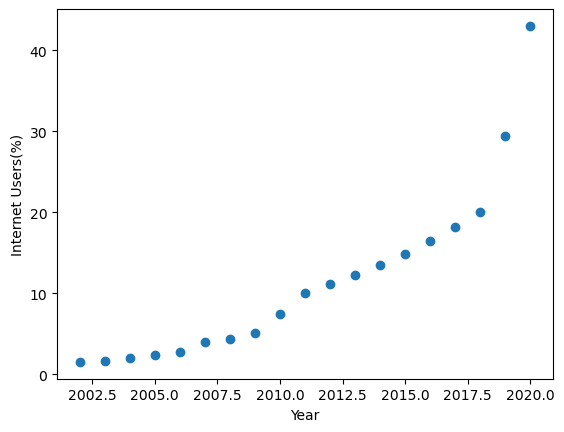

In [10]:
#df = df[(df['Cellular Subscription'] != 0) & (df['Internet Users(%)'] != 0)]
df_India = df[(df['Entity'] == 'India') & (df['Year'] <= 2020) ]
X_india = sorted(df_India['Year'].unique())
Y_india = df_India.groupby(['Year'])['Internet Users(%)'].mean().tolist()
plt.xlabel("Year")
plt.ylabel("Internet Users(%)")
plt.scatter(X_india,Y_india)

## India Model

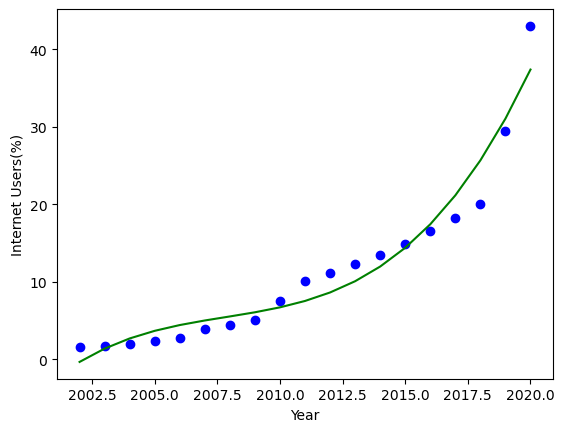

In [11]:
pre_process = PolynomialFeatures(degree=3)

X_india=np.array(X_india)

# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X_india.reshape(-1, 1))

pr_model = LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, Y_india)

# Store our predicted Humidity values in the variable y_new
y_pred = pr_model.predict(X_poly)


# Plot our model on our data
plt.scatter(X_india, Y_india, c = "blue")
plt.xlabel("Year")
plt.ylabel("Internet Users(%)")
plt.plot(X_india, y_pred, c="green")

## India Model Evaluation

In [12]:
rmse = np.sqrt(mean_squared_error(Y_india,y_pred))
r2 = r2_score(Y_india,y_pred)
print(r2)
print(rmse)

0.9483731933369479
2.3792641898252964


## Prediction

In [13]:
y_new = pr_model.predict(pre_process.fit_transform([[2020]]))
y_new

array([37.37233311])

In [14]:
filename = "model.sav"
joblib.dump(pr_model, filename)

['model.sav']

In [15]:
loaded_model = joblib.load(filename)
loaded_model.predict(pre_process.fit_transform([[2026]]))


array([100.14179261])